In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
import os
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,
Comm: tls://192.168.202.60:8786,Workers: 0
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,Total threads: 0
Started: 1 hour ago,Total memory: 0 B


In [3]:
samples = [
   "TTJets", 

]
samples2 = [ 
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
     "2Mu2E_500GeV_0p25GeV_0p004mm",
     "2Mu2E_500GeV_0p25GeV_4p0mm",
     "2Mu2E_500GeV_1p2GeV_0p019mm",
     "2Mu2E_500GeV_1p2GeV_19p0mm",
]
fileset = utilities.make_fileset(samples, 
                                 "skimmed_llpNanoAOD_v2", 
                                 location_cfg="backgrounds.yaml",
                                      max_files =15
                                     # max_files =1
                                )
fileset = utilities.make_fileset(samples2, 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_2mu2e_v10.yaml",
                                fileset=fileset,
                                  # max_files =10, 
                                    # max_files =1, 
                                )
samples2.extend(samples)
samples=samples2

In [4]:
channels = [
    # "baseNoLj", 
    "base_ljObjCut",
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["displacement_base"],
    #lj_reco_choices=["0.4"],
    # unweighted_hist=True
   
)
runner = processor.Runner(
        executor=processor.FuturesExecutor(),
      # executor=processor.IterativeExecutor(),
      # executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
    savemetrics=True,
)


# output = runner.run(fileset, treename="Events", processor_instance=p)

# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)
#output2 = runner.run(fileset1, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/coffea/processor/executor.py:1345: UserWarning: file not found ([ERROR] Server responded with an error: [3010] Unable to open /store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_v3_part-25.root; permission denied
)

    'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_v3_part-25.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirect

Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [5]:
def plot_histograms(samples, hist_list, channel, log = False, 
                     density= False,legend=None, folder_name=None, file_name=None):
    if legend == None:
        label = []
        for s in samples:
            text= s.split("_")
            print(text)
            if len(text) > 1:
                name= text[1]+ ", " + text[2] + ", " + text[3]
                label.append(name)
            else:
                label.append(s)
    if folder_name==None:
        folder_name="my_plots"
    if file_name==None:
        file_name="_"

    os.makedirs(folder_name, exist_ok=True)

    
    
    for h in range(len(histograms_list)):
        plt.figure(figsize=(12, 10))
        for s in samples:
            hists = output["out"][s]["hists"]
            if density==True:
                utilities.plot(hists[histograms_list[h]][channel,:], density=True, yerr=False)
            else:
                utilities.plot(hists[histograms_list[h]][channel,:], density=False, yerr=False)
            if legend!=None:
                plt.legend(legend)
            else:
                plt.legend(label)
                #ax[0].set_title(channel)
            if log == True:
                plt.yscale("log")
        filename = file_name +channel+ histograms_list[h]
        save_path = os.path.join(folder_name, filename)         
        plt.savefig(save_path)
        plt.savefig(save_path)
        plt.show()
        plt.close()
    

In [6]:
foldername =  "500withNewDefinitionforElectrons"
channelname = "base_ljObjCut"

['2Mu2E', '500GeV', '5p0GeV', '0p8mm']
['2Mu2E', '500GeV', '5p0GeV', '80p0mm']
['2Mu2E', '500GeV', '0p25GeV', '0p004mm']
['2Mu2E', '500GeV', '0p25GeV', '4p0mm']
['2Mu2E', '500GeV', '1p2GeV', '0p019mm']
['2Mu2E', '500GeV', '1p2GeV', '19p0mm']
['TTJets']


<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

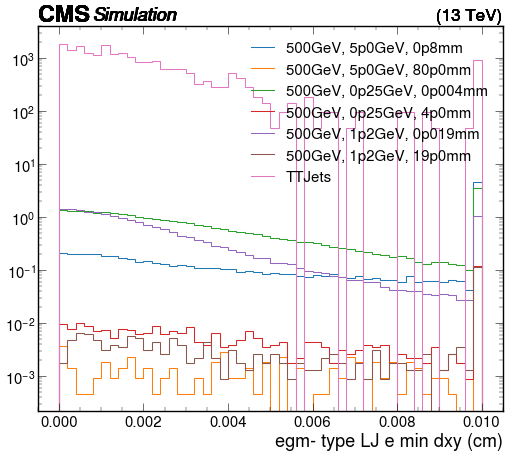

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

In [8]:
histograms_list = [ "egm_lj_pt", "egm_lj_electron_dxy_XLowRange",
                    "egm_lj_electron_min_dxy_XLowRange", 
                   "egm_lj_electron_max_dxy_XLowRange",
                   "egm_lj_electron_dxy_XXXXLowRange",
                   "egm_lj_electron_max_dxy_XXXXLowRange",
                   "egm_lj_electron_min_dxy_XXXXLowRange",
                    "egm_lj_electronN", "egm_lj_photonN", 
                   "egm_lj_electron_lostHits",
                    "mu_lj_pfMuon_dxy_lowRange",
                   "mu_lj_pfMuon_min_dxy",
                   "mu_lj_pfMuon_max_dxy",
                   "mu_lj_pfMuon_min_dxy_XLowRange",
                   "mu_lj_pt", 
                ]
#legend=[r"<$L_{xy}$>= 0.3 cm", r"<$L_{xy}$>= 300 cm", r"$t\overline{t}$"]
samples= ["2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "2Mu2E_500GeV_0p25GeV_0p004mm",
     "2Mu2E_500GeV_0p25GeV_4p0mm",
     "2Mu2E_500GeV_1p2GeV_0p019mm",
     "2Mu2E_500GeV_1p2GeV_19p0mm",
          "TTJets"]
plot_histograms(samples, histograms_list, channelname, density=True,
                log=True, folder_name=foldername, file_name ="500")



In [9]:
histograms_list = [
     "genE_dxy", "genMu_dxy", "genMu_dxy_lowRange",
    "genE_dxy_lowRange","genE_dxy_XLowRange",
    "genE_dxy_XXLowRange",
    "genMu_dxy_XLowRange", "genMu_dxy_XXLowRange"
]
samples= ["2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
     "2Mu2E_500GeV_0p25GeV_0p004mm",
     "2Mu2E_500GeV_0p25GeV_4p0mm",
     "2Mu2E_500GeV_1p2GeV_0p019mm",
     "2Mu2E_500GeV_1p2GeV_19p0mm",
         "TTJets"]
plot_histograms(samples, histograms_list, channelname, density=True,
                log=True, folder_name=foldername, file_name ="500")

['2Mu2E', '500GeV', '5p0GeV', '0p8mm']
['2Mu2E', '500GeV', '5p0GeV', '80p0mm']
['2Mu2E', '500GeV', '0p25GeV', '0p004mm']
['2Mu2E', '500GeV', '0p25GeV', '4p0mm']
['2Mu2E', '500GeV', '1p2GeV', '0p019mm']
['2Mu2E', '500GeV', '1p2GeV', '19p0mm']
['TTJets']


<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>

<Figure size 600x500 with 1 Axes>